# Filtros FIR diseñados por el algoritmo de Parks-McClellan (PM)
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

## Introducción

El algoritmo de Parks-McClellan (PM) es una herramienta poderosa utilizada para diseñar filtros FIR óptimos en términos de la minimización del error máximo en las bandas de frecuencia de interés. Se entiende al error como la diferencia entre una respuesta deseada (e.g. plantilla del filtro) y la obtenida por el algoritmo PM. Es decir que éste algoritmo distribuye el error de manera acotada en toda la banda de frecuencia, razón por la cual se lo suele denominar como error de Chebyshev o *equirriple*. La fundamentación matemática de este algoritmo se basa en el método de la alternancia de Remez, y una búsqueda iterativa de las frecuencias extremas que acotan la señal de error, como se verá más abajo. El objetivo final es encontrar los coeficientes de un filtro FIR cuya respuesta de módulo coincide con la del filtro óptimo en el sentido *minimax*.

### Respuesta deseada y real del filtro

Se define la respuesta deseada $ D(\Omega) $ en la banda de frecuencia digital, donde $ \Omega $ es la frecuencia angular que va de $ 0 $ a $ \pi $ radianes. Tener en cuenta el correlato que existe entre apertura angular y frecuencia digital (en Hz) ya que $ \pi $ radianes coincidirán con la mitad de la frecuencia de muestreo $fs$, es decir con la frecuencia de Nyquist.

Para un filtro FIR de $ L $ coeficientes, la respuesta en frecuencia se puede expresar como:

$$
H(\Omega) = \sum_{k=0}^{L-1} h(k) \cdot e^{-j2\pi\Omega k} = H_R(\Omega) \cdot e^{j \cdot \varphi(\Omega) \cdot k}
$$

De los filtros FIR de tipo $I$ podemos decir que la parte real será:

$$
H_R(\Omega) = \sum_{k=0}^{M} 2.h(M-k) \cdot \cos(\pi\Omega k) =  h(M) + \sum_{k=1}^{M} 2.h(M-k) \cdot \cos(\pi\Omega k)
$$

y recordando que el módulo del filtro es $ \left| H(\Omega) \right| = \left| H_R(\Omega) \right| $. Del mismo modo consideraremos $M = \frac{L-1}{2}$ al punto medio de la respuesta al impulso $h(k)$, que para los filtros FIR tipo $I$ debe ser una cantidad entera de muestras y coincide con el retardo del filtro. En este caso la muestra $h(M)$ de la respuesta del filtro.

Se verá que al querer expresar matricialmente la función objetivo a minimizar, resultará más útil expresar la respuesta:

$$
H_R(\Omega) = \sum_{k=0}^{M} a(k) \cdot \cos(\pi\Omega k)
$$


<img src="./img/pm_respuesta_real_deseada.png" align="center" style="display: block; margin: 0 auto;" /> 

<img src="./img/pm_error.png" align="center" style="display: block; margin: 0 auto;" /> 


### Criterio Minimax
El objetivo del algoritmo es minimizar el error entre $ H_R(\Omega) $ y $ D(\Omega) $ en las bandas de frecuencia de interés. El error ponderado se define como:

$$
E(\Omega) = W(\Omega) \cdot [D(\Omega) - H_R(\Omega)]
$$

donde $ W(\Omega) $ es una función de peso o ponderación, que permite enfatizar o atenuar el error en diferentes partes de la banda de frecuencia. De esta manera el algoritmo de diseño enfoca la iteración en acercarse más a la atenuación mínima de la banda de rechazo ($\alpha_{min}$) o el ripple en banda ($\alpha_{max}$)

El problema de optimización se formula como una **minimización del máximo error absoluto**:

$$
\min_h \max_{\Omega \in \Omega} \left| E(\Omega) \right|
$$

Casualmente el teorema de la alternancia de Remez permitirá hallar $H_R(\Omega)$ que satisfaga este criterio


<img src="./img/pm_error_pesado.png" align="center" style="display: block; margin: 0 auto;" /> 


### Teorema de la Alternancia y algoritmo de Remez
El *Teorema de la Alternancia* será fundamental para la formulación del error en forma matricial, de manera que sea fácilmente implementado en cualquier lenguaje de programación. El algoritmo de Parks-McClellan, establece que la solución óptima de un problema *minimax* es aquella donde el error ponderado $ E(\Omega) $ alterna en signo en **al menos** $ R = M + 2 $ puntos extremos, y que el error tiene el mismo valor absoluto en estos puntos.

Matemáticamente, si $F=[ \Omega_0, \Omega_1, \dots, \Omega_{R-1}] $ son los puntos extremos de $ \Omega $, entonces en la solución óptima se cumple:

$$
E(\Omega_i) = (-1)^i \cdot \epsilon \quad \text{para } i = 0, 1, \dots, R-1
$$

Donde:
- $ \epsilon $ es el valor del ripple del error pesado. En caso de que el algoritmo arribe al filtro óptimo, este será el máximo valor del error y ocurrirá en las frecuencias extremas..
- $ E(\Omega) $ es el error pesado entra la respuesta deseada y la del filtro diseñado.

### Planteo Matricial y cálculo de $h_i(k)$

El algoritmo se basa en la solución de un problema de aproximación que se puede expresar matricialmente y solucionarse mediante álgebra matricial:

$$
W(\Omega) \cdot [D(\Omega) - H_R(\Omega)] = 
$$

$$
 H_R(\Omega) + \frac{(-1)^i \cdot \epsilon}{W(\Omega)} = D(\Omega) 
$$

$$
 \sum_{k=0}^{M} a(M-k) \cdot \cos(\pi\Omega k) + \frac{(-1)^i \cdot \epsilon}{W(\Omega)} = D(\Omega) 
$$

$$
\begin{bmatrix}
1 &  \cos(\Omega_0) &  \cos(2\Omega_0) & \dots &  \cos(M\Omega_0) & \frac{(-1)^0}{W(\Omega_0)} \\
1 &  \cos(\Omega_1) &  \cos(2\Omega_1) & \dots &  \cos(M\Omega_1) & \frac{(-1)^1}{W(\Omega_1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
1 &  \cos(\Omega_{R-1}) &  \cos(2\Omega_{R-1}) & \dots &  \cos(M\Omega_{R-1}) & \frac{(-1)^{R-1}}{W(\Omega_{R-1})}  \\
\end{bmatrix}
\begin{bmatrix}
a_M \\
a_{M-1} \\
\vdots \\
a_0 \\
\epsilon \\
\end{bmatrix}
=
\begin{bmatrix}
 D(\Omega_0) \\
 D(\Omega_1) \\
\vdots \\
 D(\Omega_{R-1}) \\
\end{bmatrix}
$$

Este sistema de ecuaciones se resuelve para los valores de $a_i(k)$, en la *i-ésima* iteración, y luego se calculan los coeficientes $h_i(k)$ (ver Tabla 1bis), siendo:

* $ h_i(0) = a_i(M-1)/2 $
* $ h_i(1) = a_i(M-2)/2 $
* $ \quad \vdots $
* $ h_i(M-2) = a_i(1)/2 $
* $ h_i(M-1) = a_i(0) $

y por simetría:

* $ h_i(0) = h_1(L) $
* $ h_i(1) = h_i(L-1) $
* $ \quad \vdots $
* $ h_i(M) $ (eje de simetría de la respuesta al impulso)

Notar que los coeficientes del filtro se calculan en las frecuencias extremas exclusivamente. En el paso siguiente se busca refinar la posición de dichas frecuencias.

### Actualización de frecuencias extremas $F_i$

En base a los coeficientes calculados en el paso anterior, se recalcula la respuesta en frecuencia en una grilla frecuencial *interpolada*. Esto es para refinar la posición de las frecuencias extremas calculadas en el paso anterior

$$
H_i(\Omega) = \sum_{k=0}^{L-1} h_i[k] \cdot e^{-j2\pi\Omega k} 
$$

y la señal de error

$$
E_i(\Omega) = W(\Omega) \cdot [D(\Omega) - H_{Ri}(\Omega)]
$$

que resultará en un nuevo juego de **valores extremos** para cada $i$-ésima iteración 

$ F_i = [ \Omega_{0,i}, \Omega_{1,i}, \dots, \Omega_{R-1,i}] $ 

Si se verifica que el $ \left| E_i(F_i) \right| \leq \epsilon,$ significa que el algoritmo PM arribó a la solución  óptima en el sentido *minimax* y el resultado del algoritmo será $h_i(k)$.

En caso contrario, se vuelve a resolver el sistema de ecuaciones matricial, para el nuevo juego de frecuencias $F_i$, hasta que el algoritmo arribe al criterio *minimax* o se alcance un máximo de iteraciones predefinido.


### Filtro resultante y aspectos prácticos

El algoritmo de Parks-McClellan es una herramienta eficiente para diseñar filtros FIR **óptimos** en términos de minimizar el error extremo en las bandas de frecuencia de interés (paso y atenuación). Los filtros resultantes de este algoritmo presentan una respuesta $H_R(\Omega)$ oscilatoria en ambas bandas, denominada *equiripple* y es uno de los aspectos distintivos de la optimización *minimax*. Cuando el algoritmo converge satisfactoriamente, los filtros equiripple alcanzan la respuesta deseada $D(\Omega)$ (dentro de una tolerancia prestablecida) con un tamaño $L$ (coeficientes) que generalmente es el más bajo posible. Este aspecto de optimicidad del tamaño se verifica en la generalidad de los diseños con transferencias habituales (pasabajo, pasabanda, etc.), aunque **no significa** que se cumple en la totalidad de los casos o posibles diseños. Es decir, no está matemáticamente garantizado que sean filtros óptimos respecto a la cantidad de coeficientes $L$.

Es decir que se trata de un algoritmo muy práctico, **siempre que se converja a la solución óptima**. La inclusión de una función de peso $ W(\Omega) $ permite personalizar el diseño para cumplir con especificaciones particulares en diferentes bandas de frecuencia.

El algoritmo PM requiere como argumentos:

* El orden $N = L-1$. Algunas implementaciones requieren N, otras L, requiere leer la documentación del software.
* Los comienzos y finales de cada banda en la respuesta deseada $D$.
* Los valores de la respuesta deseada $D$ para cada banda.
* Los pesos de cada banda $W$
* El tipo de simetría FIR (I-IV) o transferencia (multibanda, derivador, hilbert).

El resultado del algoritmo PM será la respuesta al impulso $h(k)$ de $L$ coeficientes.


### Problemas de convergencia

El aspecto menos atractivo de este algoritmo es que la convergencia **no está garantizada**. Por este motivo siempre es necesario verificar que:

$$ \left| E_i(F_i) \right| \leq \epsilon $$

Existen diversas situaciones, imposibles de compaginar en este texto, en que los parámetros de entrada del algoritmo PM no favorecen la convergencia. Esto no suele ser una limitación ya que cambiando levemente alguno o varios de ellos, podemos evitar estos inconvenientes. Si bien los procedimientos son mayormente artesanales y dependen del tipo de filtro y sus requerimientos, se pueden dar algunos lineamientos:

* Relajar los requerimientos del filtro: 1) aumentar $N$, 2) separar las bandas de frecuencia, 3) aumentar el ripple y 4) disminuir la atenuación mínima. Esto si bien aplica solo para filtros multibanda (tipo I y II), también puede adaptarse a derivadores y transformadores de Hilbert (tipo III y IV).
* Para orientar la búsqueda anterior, pueden utilizarse otros algoritmos de diseño de FIR's que garanticen la obtención de un filtro (LS y/o ventanas). Analizando los filtros diseñados, podemos especular acerca de los ajustes que podemos realizar respecto a los parámetros de entrada.



### Extensión a otros tipos de FIR 

Si se reformula la expresión de la respuesta en frecuencia como

$$
H(\Omega) = Q(\Omega) \cdot A(\Omega) \cdot  e^{-j \Omega \cdot \frac{L-1}{2} - \beta}
$$

siendo

$$
A(\Omega) = \sum_{k=0}^{M-1} a(k) \cdot \cos(\pi\Omega k)
$$

y 

$$
H_R(\Omega) = Q(\Omega) \cdot A(\Omega)
$$


Se puede reformular el error pesado como 

$$
E(\Omega) = W(\Omega) \cdot [D(\Omega) - H_R(\Omega)]
$$

entonces

$$
E = W \cdot [D - Q \cdot A]
$$

finalmente

$$
E = W \cdot  Q \cdot [ \frac{D}{Q} - A]
$$

Es decir que el algoritmo de PM sigue resultando útil para cualquier tipo de filtro FIR, simplemente alterando la respuesta deseada $D$ y el pesaje por banda $W$ por la respuesta $Q(\Omega)$ que figura en la Tabla 1.

| **Type** | **Symmetry** | **Length** | $ M $             | $ \beta $ | $ Q(\Omega) $        | $ a[m] $                                                                                                                |
|----------|--------------|------------|---------------------|-------------|------------------------|---------------------------------------------------------------------------------------------------------------------------|
| **I**    | Even           | Odd        | $ \frac{L-1}{2} $       | 0           | 1                      | $ \begin{cases} h[M-1], & m = 0 \\ 2h[M-1-m], & 1 \leq m \leq M-1 \end{cases} $                                           |
| **II**   | Even          | Even       | $ \frac{L}{2} $          | 0           | $ \cos{(\Omega/2)} $   | $ \begin{cases} 2h[M-1] - a[1]/2, & m = 0 \\ 4h[M-1-m] - a[m+1], & 1 \leq m \leq M-2 \\ 4h[0], & m = M-1 \end{cases} $   |
| **III**  | Odd           | Odd        | $ \frac{L-1}{2} $       | $ \pi/2 $ | $ \sin{\Omega} $     | $ \begin{cases} 2h[M-1] + a[2]/2, & m = 0 \\ 4h[M-1-m] + a[m+2], & 1 \leq m \leq M-3 \\ 4h[1], & m = M-2 \\ 4h[0], & m = M-1 \end{cases} $   |
| **IV**   | Odd             | Even       | $ \frac{L}{2} $           | $ \pi/2 $ | $ \sin{(\Omega/2)} $   | $ \begin{cases} 2h[M-1] + a[1]/2, & m = 0 \\ 4h[M-1-m] + a[m+1], & 1 \leq m \leq M-2 \\ 4h[0], & m = M-1 \end{cases} $   |

**Tabla 1**: Parámetros para los diferentes tipos de filtros FIR. (obtenido de Holton *supplementary topic* [1]).



[1] T. Holton, *Digital Signal Processing: Principles and Applications*. Cambridge University Press, 2021.



## Tabla de conversión de coeficientes

Si bien la Tabla 1 resulta muy ilustrativa respecto a cómo generalizar el algoritmo PM a otros tipos de filtro FIR, la última columna de $a(m)$ no resulta demasiado útil para la implementación del algoritmo, ya que por lo general se busca calcular $h(k)$ a partir de $a(m)$. Se muestra a continuación la misma tabla propuesta por T. Holton, levemente modificada.

| **Tipo** | **Simetría** | **Longitud** | $M$             | $\beta$     | $Q(\Omega)$        | $h(k)$                                                                                              |
|----------|--------------|------------|-----------------|-------------|--------------------|---------------------------------------------------------------------------------------------------------------------------|
| **I**    | Par           | Impar        | $ \frac{L-1}{2} $       | 0           | 1                  | $\begin{cases} a[M-1-k]/2, & 0 \leq k \leq M-2 \\ a[0], & k = M-1  \end{cases}$                                   |
| **II**   | Par          | Par       | $ \frac{L}{2} $            | 0           | $\cos{(\Omega/2)}$   | $ \begin{cases} a[M-1]/4, & k = 0 \\ (a[M-1-k] + a[M-k])/4, & 1 \leq k \leq M-2 \\ a[0]/2 + a[1]/4, & k = M-1  \end{cases}$ |
| **III**  | Impar           | Impar        | $ \frac{L-1}{2} $       | $\pi/2$     | $\sin{\Omega}$      | $  \begin{cases} a[M-1]/4, & k = 0 \\ a[M-2]/4, & k = 1 \\ (a[M-1-k] - a[M+1-k])/4, & 2 \leq k \leq M-2 \\ a[0]/2 - a[2]/4, & k = M-1 \end{cases} $ |
| **IV**   | Impar           | Par       | $ \frac{L}{2} $            | $\pi/2$     | $\sin{(\Omega/2)}$    | $ \begin{cases} a[M-1]/4, & k = 0 \\ (a[M-1-k] - a[M-k])/4, & 1 \leq k \leq M-2 \\ a[0]/2 - a[1]/4, & k = M-1  \end{cases} $ |

**Tabla 1 bis**: Parámetros y ecuaciones de diseño para los diferentes tipos de filtros FIR. (reformulado de [1])

### Ejemplo de diseño

Terminaremos la explicación con un ejemplo de diseño de un pasabajo simple de orden bajo:

* Banda de paso: 0 - 0.4 
* Banda detenida: 0.6 - 1.0
* Ripple 0.5 dB
* Atenuación 40 dB

que resulta en los siguiente parámetros de entrada:

* N = 17
* Be = [0., 0.4, 0.6, 1.]
* D = [1., 1., 0., 0.]
* W = [1., 3.]

Estos parámetros se pueden calculan de la plantilla de diseño, mientras que el orden puede estimarse a partir de la siguiente expresión [2]:

$$ N \approx \frac{-4 \pi \log (13 \delta_c \delta_s)}{3 \Delta \omega T}  $$

siendo $ \alpha_{\text{max}} $ el ripple en dB

$$ \alpha_{\text{max}} = 20 \log \left( \frac{1 + \delta_c}{1 - \delta_c} \right) \approx 17.31 \delta_c \, \text{[dB]} $$

y $ \alpha_{\text{min}} $ la atenuación mínima en dB

$$ \alpha_{\text{min}} = 20 \log \left( \frac{1 + \delta_c}{\delta_s} \right) \, \text{[dB]}  $$

obteniendo así los parámetros $ \delta_{c,s} $:

$$ \delta_c = \frac{10^{\alpha_{\text{max}} / 20} - 1}{10^{\alpha_{\text{max}} / 20} + 1} $$

$$ \delta_s = \frac{1 + \delta_c}{10^{\alpha_{\text{min}} / 20}} $$


[2] Lars Wanhammar, Tapio Saramäki - Digital Filters Using MATLAB-Springer (2020)

Convergencia exitosa!


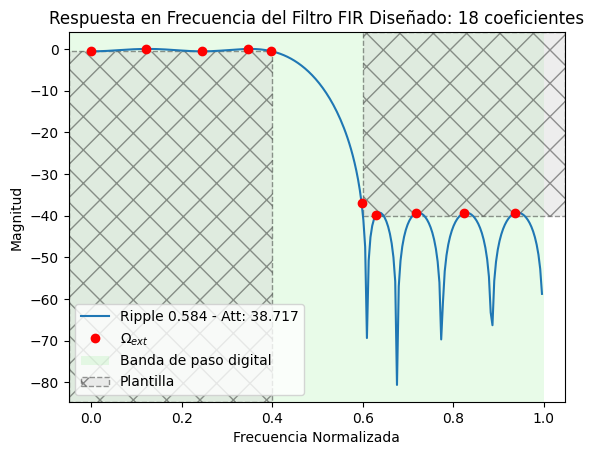

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pytc2.sistemas_lineales import plot_plantilla
from pytc2.filtros_digitales import fir_design_pm

# Parámetros PM algorithm
# Parámetros PM algorithm
fs = 2.0
maxit = 100
lgrid = 16

# tipo 1 o 2, filtros de propósitos generales: LP/HP/BP
ftype = 'lowpass'

fpass = 0.4 # 
ripple = 0.5 # dB
fstop = 0.6 # Hz
attenuation = 40 # dB

# parámetros calculados externamente para obtener aproximadamente
# 40 dB de atenuación y 0.5 dB de ripple.
Be = [0., 0.4, 0.6, 1.]
D = [1., 1., 0., 0.]
W = [1., 3.]

# tipo 1
N = 17

hh_mio, Err, wext = fir_design_pm(order=N, band_edges=Be, desired=D, 
                          weight=W, filter_type = ftype, 
                          grid_density= lgrid, max_iter=maxit, debug= False)

deltac = Err / W[0]
deltas = Err / W[-1]
ripple_obtenido = (1 + deltac) / (1 - deltac)

# Normalize the maximum gain to 1
hh_mio = hh_mio / (1 + deltac)

cant_coeffs = len(hh_mio)
alpha_max = 20 * np.log10(ripple_obtenido)
alpha_min = 20 * np.log10((1 - deltac) / deltas)

fft_sz = 512
half_fft_sz = fft_sz//2

H_mio = np.fft.fft(hh_mio, fft_sz)
frecuencias = np.arange(start=0, stop=fs, step=fs/fft_sz )

wextt = (wext * (half_fft_sz-1)).astype(int)

fig = plt.figure()
plt.clf()

# Graficar la respuesta en frecuencia
plt.plot(frecuencias[:half_fft_sz], 20*np.log10(np.abs(H_mio[:half_fft_sz])), label=f'Ripple {alpha_max:.3f} - Att: {alpha_min:.3f}')
plt.plot(frecuencias[wextt], 20*np.log10(np.abs(H_mio[wextt])), 'or', label='$\Omega_{ext}$')

plot_plantilla(filter_type = ftype , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

ax = plt.gca()
plt.title(f"Respuesta en Frecuencia del Filtro FIR Diseñado: {cant_coeffs} coeficientes")
plt.xlabel("Frecuencia Normalizada")
plt.ylabel("Magnitud")
plt.legend()
plt.show()



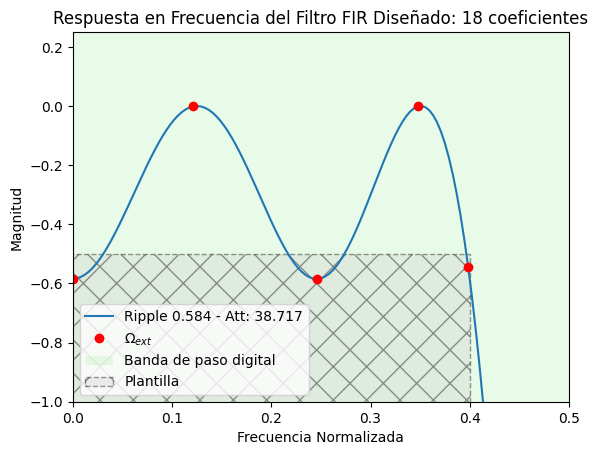

In [2]:
ax.set_xlim([0, np.mean((fpass,fstop))])
ax.set_ylim([-2*ripple, np.mean((-ripple,1)) ])
fig

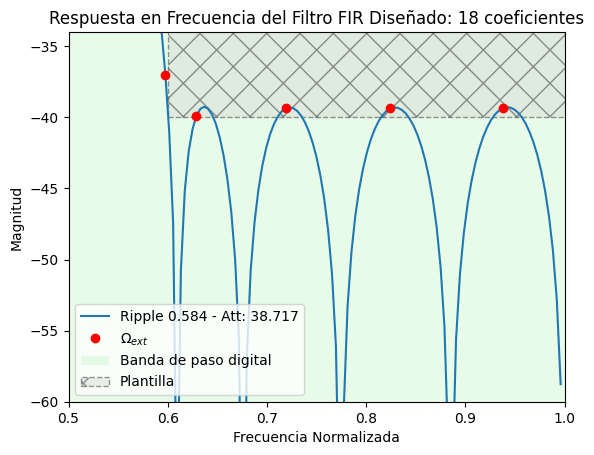

In [3]:
ax.set_xlim([np.mean((fpass,fstop)), 1])
ax.set_ylim([-1.5*attenuation, -.85* attenuation ])
fig

Como se observa, el diseño no ha sido exitoso y se debe aumentar el orden y volver a intentar el diseño.

Convergencia exitosa!


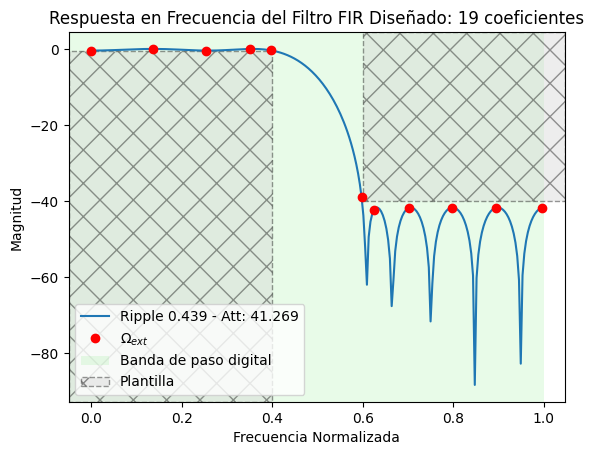

In [4]:
N = 18
W = [1., 3.]

hh_mio, Err, wext = fir_design_pm(order=N, band_edges=Be, desired=D, 
                          weight=W, filter_type = ftype, 
                          grid_density= lgrid, max_iter=maxit, debug= False)

deltac = Err / W[0]
deltas = Err / W[-1]
ripple_obtenido = (1 + deltac) / (1 - deltac)

cant_coeffs = len(hh_mio)
alpha_max = 20 * np.log10(ripple_obtenido)
alpha_min = 20 * np.log10((1 - deltac) / deltas)

# Normalize the maximum gain to 1
hh_mio = hh_mio / (1 + deltac)

H_mio = np.fft.fft(hh_mio, fft_sz)
wextt = (wext * (half_fft_sz-1)).astype(int)

fig = plt.figure()
plt.clf()

# Graficar la respuesta en frecuencia
plt.plot(frecuencias[:half_fft_sz], 20*np.log10(np.abs(H_mio[:half_fft_sz])), label=f'Ripple {alpha_max:.3f} - Att: {alpha_min:.3f}')
plt.plot(frecuencias[wextt], 20*np.log10(np.abs(H_mio[wextt])), 'or', label='$\Omega_{ext}$')

plot_plantilla(filter_type = ftype , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

ax = plt.gca()
plt.title(f"Respuesta en Frecuencia del Filtro FIR Diseñado: {cant_coeffs} coeficientes")
plt.xlabel("Frecuencia Normalizada")
plt.ylabel("Magnitud")
plt.legend()
plt.show()


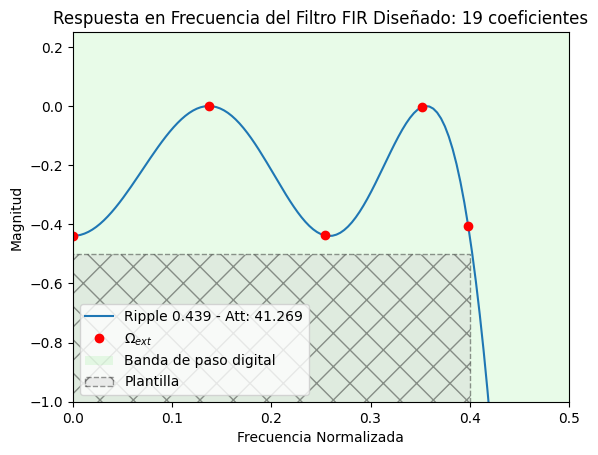

In [5]:
ax.set_xlim([0, np.mean((fpass,fstop))])
ax.set_ylim([-2*ripple, np.mean((-ripple,1)) ])
fig

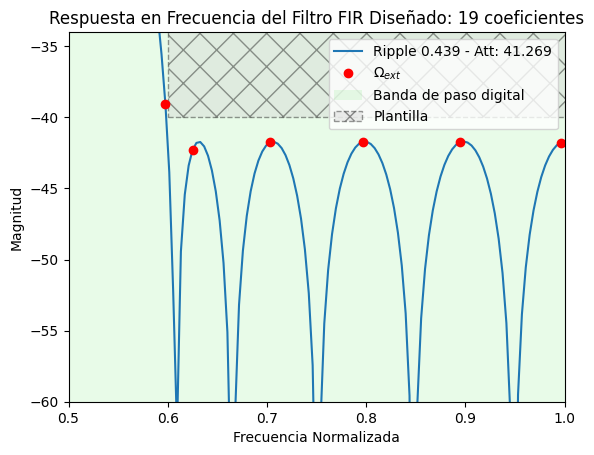

In [6]:
ax.set_xlim([np.mean((fpass,fstop)), 1])
ax.set_ylim([-1.5*attenuation, -.85* attenuation ])
fig

Se observa que el filtro diseñado satisface a la plantilla de diseño, concluyendo el ejemplo.

### Convergencia del algoritmo

A modo de ejemplo didáctico se muestra cómo el algoritmo itera y **arriba exitosamente** a la solución *minimax* presentada en el paso anterior.

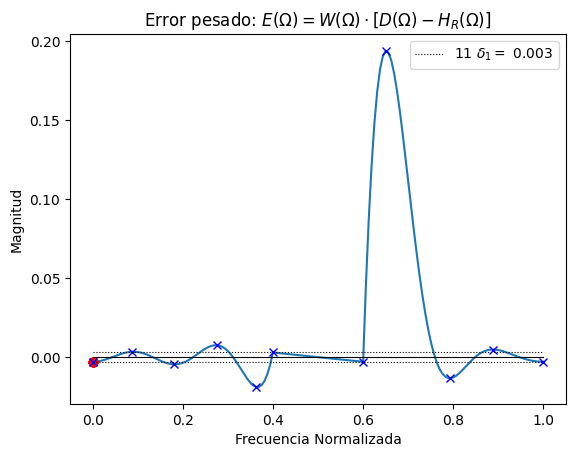

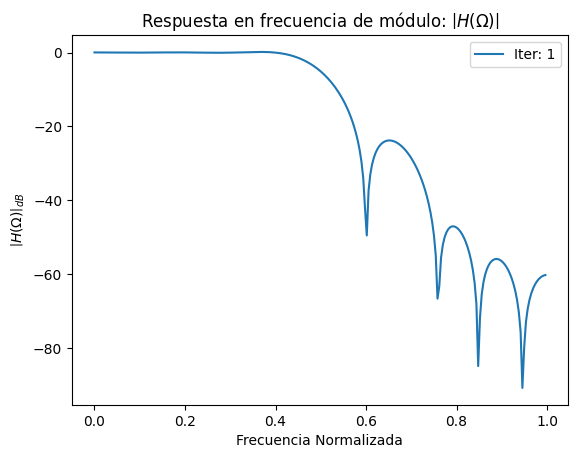

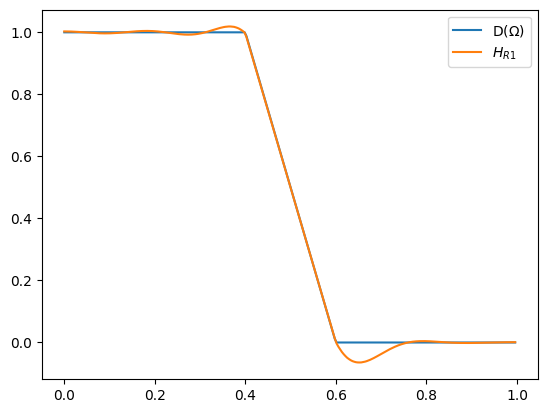

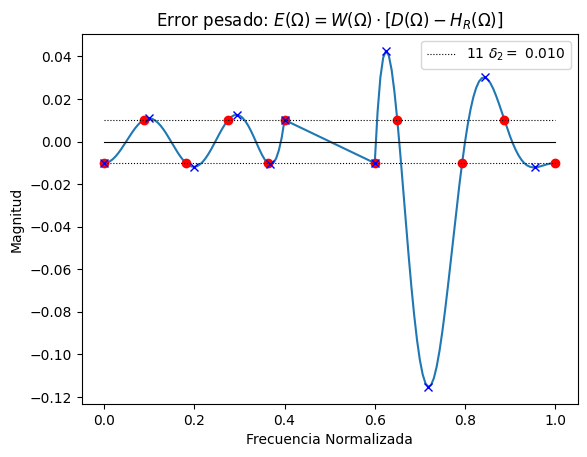

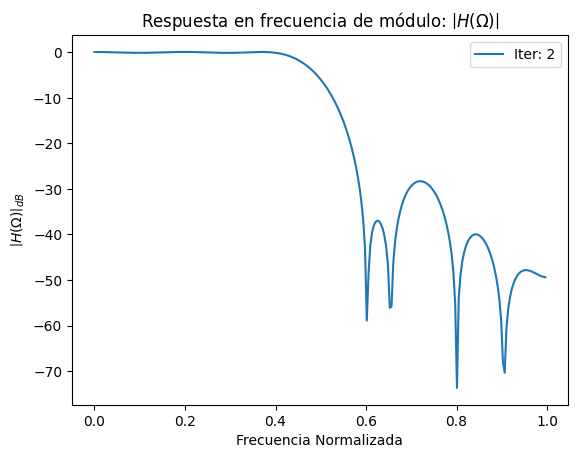

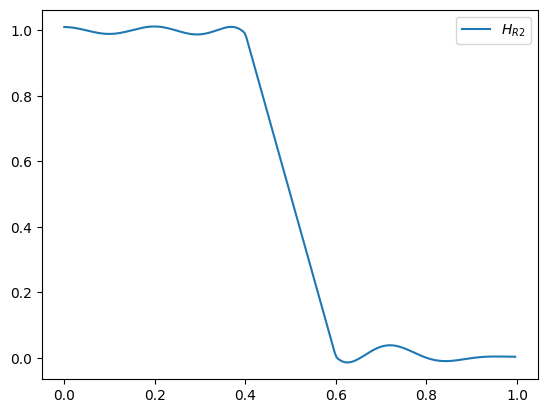

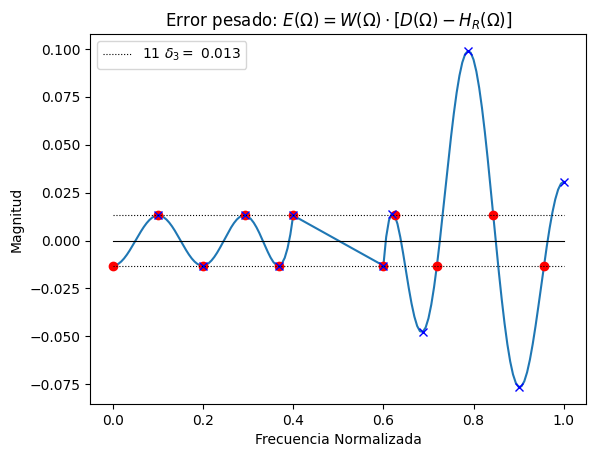

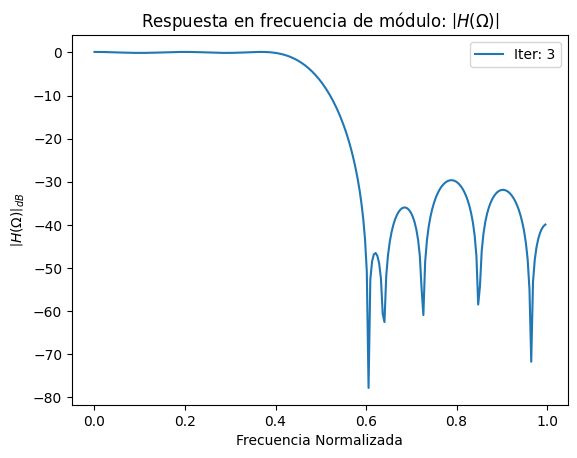

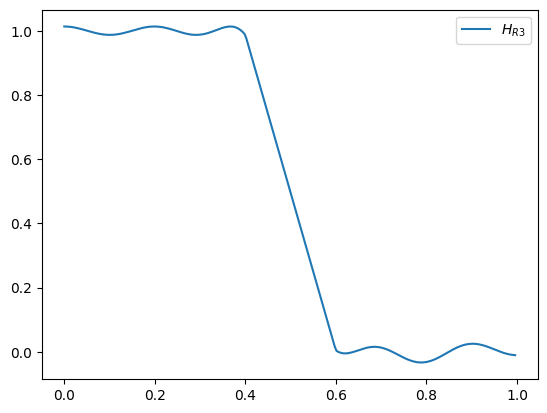

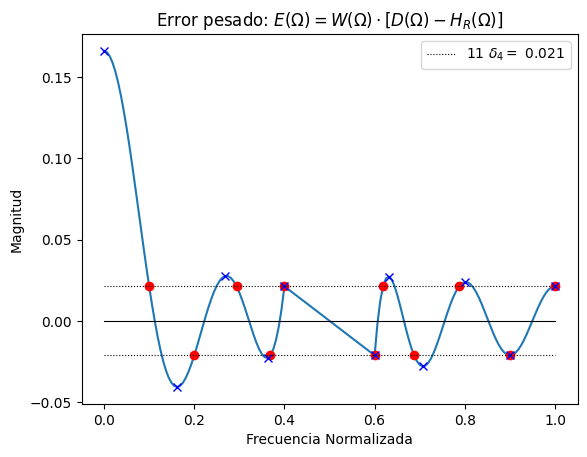

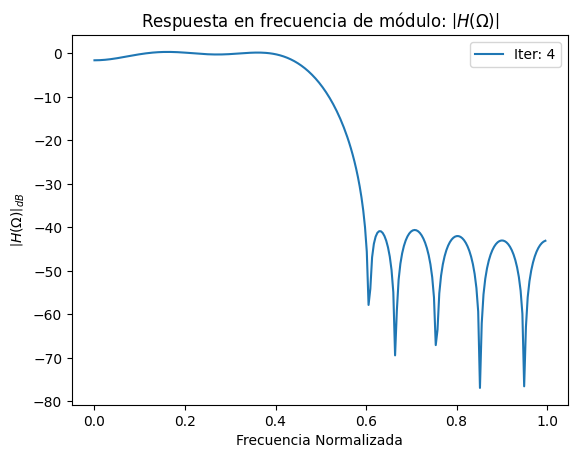

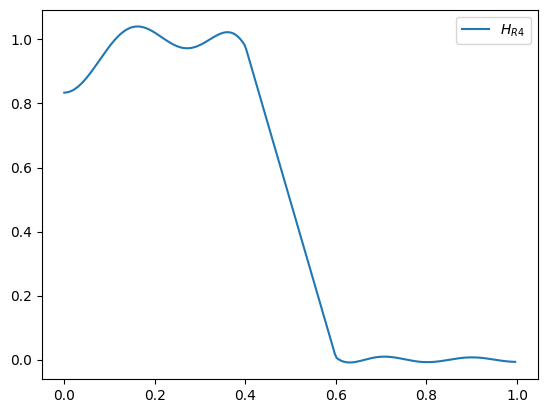

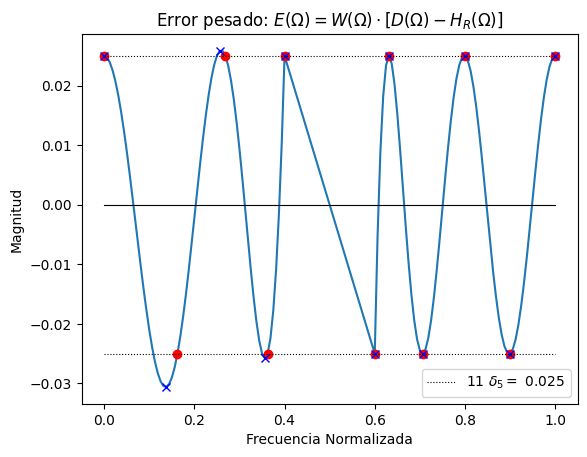

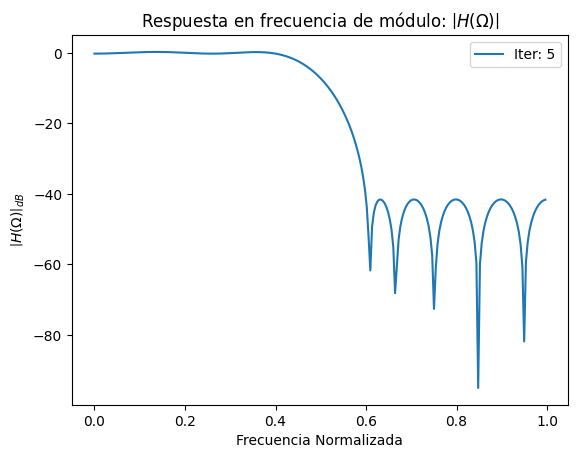

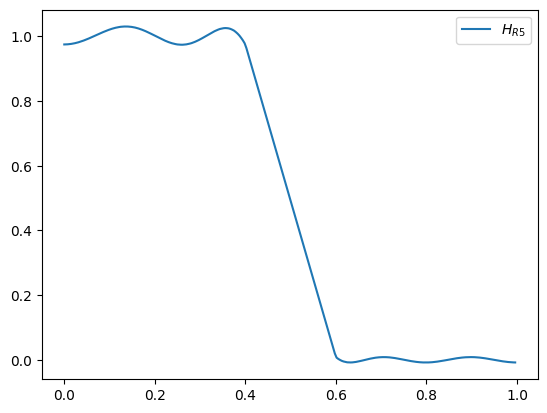

Convergencia exitosa!


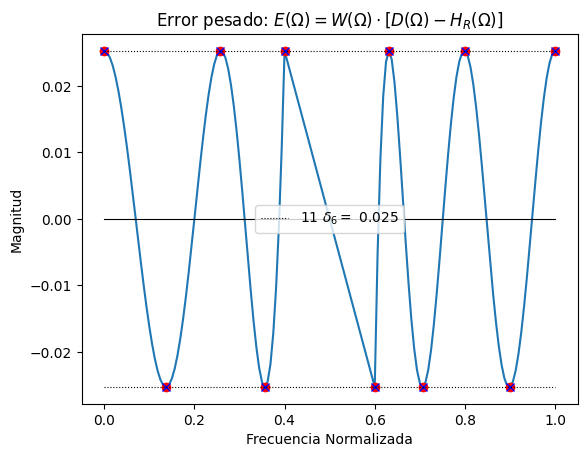

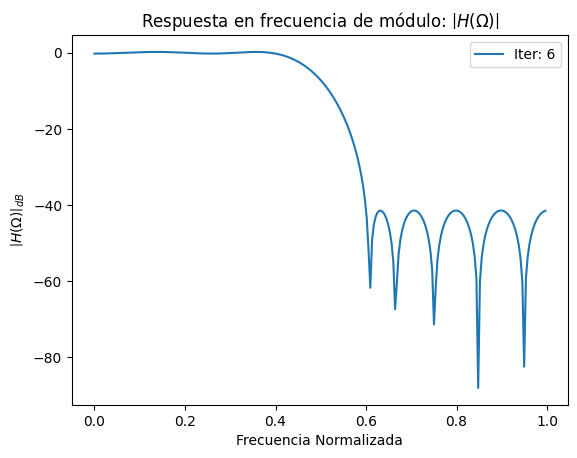

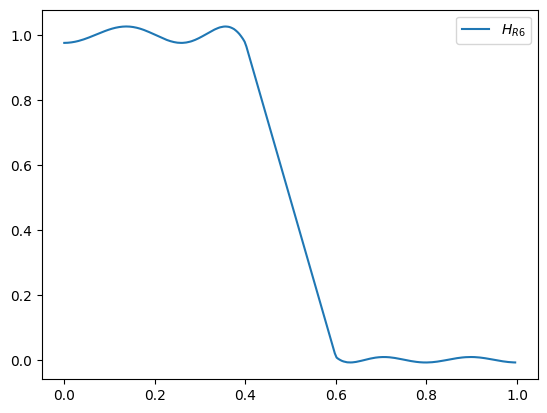

In [7]:

hh_mio, Err, wext = fir_design_pm(order=N, band_edges=Be, desired=D, 
                          weight=W, filter_type = ftype, 
                          grid_density= lgrid, max_iter=maxit, debug= True)


Como comentario final, observar como el error pesado coincide con el máximo error absoluto, para cada frecuencia extrema (círculos rojos).